In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from sklearn.ensemble import RandomForestClassifier

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [157]:
df = pd.read_csv('./input/train.csv')#.dropna() #There is a nan in here?
df_test = pd.read_csv('./input/test.csv')#.dropna() #There is a nan in here?


In [31]:
sample = pd.read_csv('./input/sample_submission.csv').dropna() #There is a nan in here?

# SAMPLE SUBMISSION FILE

In [150]:
samplesub = df_test['test_id']
is_duplicate = np.zeros(len(samplesub), dtype=np.int)

samplesub
dfsub = pd.DataFrame(data=np.array(samplesub), columns=['test_id'])
#dfsub.loc[:, 4] = pd.Series(samplesub, index=dfsub.index)
dfsub.loc[:, 'is_duplicate'] = pd.Series(is_duplicate, index=dfsub.index)
#dfsub

In [152]:
dfsub.to_csv('dfsub.csv', index=False)
len(dfsub)
2345796 

2345796

In [3]:
corpus =pd.concat([df.question1,df.question2])

cv = CountVectorizer().fit(corpus)

duplicates = df.loc[df.is_duplicate==1,['question1','question2']]
nondupes = df.loc[df.is_duplicate==0,['question1','question2']]

In [162]:
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [4]:
non_dupes_csim = []

# Right now range/10 due to time
for j in range(int(nondupes.shape[0]/10)):
    
    a = cv.transform([nondupes.iloc[j].question1])
    b = cv.transform([nondupes.iloc[j].question2])
    
    non_dupes_csim.append( cosine_similarity(a,b).ravel()[0])
duplicates_csim = []
counter = 0
# Right now range/10 due to time
for j in range (int(duplicates.shape[0]/10)):
    a = cv.transform([duplicates.iloc[j].question1])
    b = cv.transform([duplicates.iloc[j].question2])
    counter += 1
    
    duplicates_csim.append( cosine_similarity(a,b).ravel()[0])

0    What is the step by step guide to invest in sh...
0    What is the step by step guide to invest in sh...
dtype: object

In [21]:
all_csim = []
# Right now range/10 due to time
for j in range (int(duplicates.shape[0]/20)):
    a = cv.transform([duplicates.iloc[j].question1])
    b = cv.transform([duplicates.iloc[j].question2])
    counter += 1
    
    duplicates_csim.append( cosine_similarity(a,b).ravel()[0])

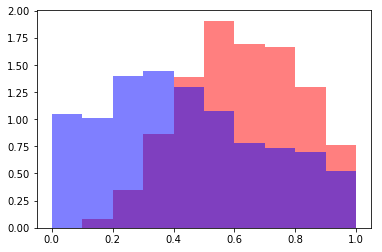

In [22]:
plt.hist(duplicates_csim, alpha = 0.5, color = 'r', normed = True, bins = np.linspace(0,1,11))
plt.hist(non_dupes_csim, alpha = 0.5, color = 'b', normed = True, bins = np.linspace(0,1,11))
plt.show()

In [25]:
print(np.mean(duplicates_csim))
print(np.mean(non_dupes_csim))
all_csim

0.625402784023
0.433806865541


# train classifier

In [155]:
myfor = RandomForestClassifier(n_estimators = 100)
forest.fit()